In [1]:
import random
import time


In [2]:
import zipfile

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import time
import tensorflow_addons as tfa

c:\Users\Chinmay\anaconda3\envs\tf_env\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Chinmay\anaconda3\envs\tf_env\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.

In [4]:
print(tf.config.list_physical_devices('GPU'))


[]


In [6]:
from tkinter import Tk
from tkinter.filedialog import askdirectory

# Hide the main Tkinter window
Tk().withdraw()
# Print the selected folder
print(f"Please select the folder from the pop up, it will appear after you minimize this window:")
# Ask the user to select the folder with custom text
home_folder = askdirectory(title="Select the Project_submission folder")

# Check if a folder was selected
if not home_folder:
    print("No folder selected. Exiting.")
    exit()

# Print the selected folder or use it in your script
print(f"Selected folder: {home_folder}")


Please select the folder from the pop up, it will appear after you minimize this window:
Selected folder: D:/Others/Project_Submission_ALL_DATA


In [5]:
# def unzip(file):
#     with zipfile.ZipFile(file ,'r') as zip:
#         zip.extractall()
#         print("Files extracted successfully....")

# unzip('Cattle_DataSet_4_Classes_yolo_dataset-20240310T121844Z-001.zip')

In [7]:
import os
first_folder = os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups")

def walk_through_dir(dir_path):
  count_images = 0
  for dirpath, dirnames, filenames in os.walk(dir_path):
    count_images += len(filenames)
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
  print(f"Total Images : {count_images}")
walk_through_dir(first_folder)

There are 3 directories and 0 images in 'D:/Others/Project_Submission_ALL_DATA\Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups'.
There are 4 directories and 0 images in 'D:/Others/Project_Submission_ALL_DATA\Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups\test'.
There are 0 directories and 148 images in 'D:/Others/Project_Submission_ALL_DATA\Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups\test\Group 1 ( 1 to 5 years)'.
There are 0 directories and 138 images in 'D:/Others/Project_Submission_ALL_DATA\Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups\test\Group 2 ( 5.1 to 9 years)'.
There are 0 directories and 107 images in 'D:/Others/Project_Submission_ALL_DATA\Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups\test\Group 3 ( 9.1 to 13 years)'.
There are 0 directories and 56 images in 'D:/Others/Project_Submission_ALL_DATA\Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups\test\Group 4 ( 1

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE =(224 , 224)
BATCH_SIZE=32

train_dir = os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups/train")
test_dir = os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups/test")
val_dir = os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups/val")

train_dir = os.path.join(home_folder, train_dir)
test_dir =  os.path.join(home_folder, test_dir)
val_dir = os.path.join(home_folder, val_dir)

train_datagen = ImageDataGenerator(rescale = 1/255. , rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data =train_datagen.flow_from_directory(train_dir ,
                                              target_size =IMAGE_SHAPE,
                                              batch_size = BATCH_SIZE,
                                              class_mode ="categorical",
                                              shuffle = True

                                              )
print("Training images:")
val_data =val_datagen.flow_from_directory(val_dir ,
                                              target_size =IMAGE_SHAPE,
                                              batch_size = BATCH_SIZE,
                                              class_mode ="categorical",
                                              shuffle = True)
print("Testing images:")
test_data =test_datagen.flow_from_directory(test_dir ,
                                              target_size =IMAGE_SHAPE,
                                              batch_size = 1,
                                              class_mode ="categorical",
                                              shuffle = False)

Training images:
Found 2008 images belonging to 4 classes.
Training images:
Found 426 images belonging to 4 classes.
Testing images:
Found 449 images belonging to 4 classes.


In [9]:
# Getting Class Names
# Define class labels
labels = test_data.class_indices.keys()
labels = list(labels)
class_names = labels
print(f"Class Names : {class_names}")

Class Names : ['Group 1 ( 1 to 5 years)', 'Group 2 ( 5.1 to 9 years)', 'Group 3 ( 9.1 to 13 years)', 'Group 4 ( 13.1 and above)']


In [10]:

def create_tensorboard_callback(experiment_name, dir_name = os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/LogsDirectory")):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [11]:
import matplotlib.pyplot as plt

def plot_loss_curves(history , file_name , save_dir = os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Accuracy_Curves")):
    # Get training and validation loss values
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get training and validation accuracy values
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Plot the loss curves
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot the accuracy curves
    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.savefig(os.path.join(save_dir ,file_name))
    plt.show()





In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix , classification_report
import seaborn as sns

def evaluate_multiclass(y_true, y_pred , labels):
    # Compute accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Compute precision
    precision = precision_score(y_true, y_pred, average='weighted')

    # Compute recall
    recall = recall_score(y_true, y_pred, average='weighted')

    report = classification_report(y_true, y_pred, output_dict=True)


    return accuracy, precision, recall , report

def plot_confusion_matrix(cm, labels, File_Name, save_dir=os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/ConfusionMatrix")):
    fig, ax = plt.subplots(figsize=(10,10))
    cax = ax.matshow(cm, cmap='Blues')

    # Add color bar
    plt.colorbar(cax)

    # Set labels
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)

    # Rotate x-axis labels
    ax.xaxis.set_tick_params(rotation=45)

    # Set labels at ticks
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    # Display values in each cell
    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center')

    # Save plot
    plt.savefig(os.path.join(save_dir, File_Name))

    # Show plot
    plt.show()




In [13]:
def load_and_prep_image(filename, img_shape=224, scale=False):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img , channels=3)

  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [ ]:
# # Make preds on a series of random images
# import os
# import random

# def Some_Predictions_on_Test_Data(test_dir , class_names , model , scale ,file_name , save_dir ="Model_Results/Some_Predictions" ):
#         plt.figure(figsize=(17,10))
#         for i in range(6):
#           # Choose a random image from a random class
#           class_name = random.choice(class_names)
#           filename = random.choice(os.listdir(test_dir + "/" + class_name))
#           filepath = test_dir + class_name + "/" + filename

#           # Load the image and make predictions
#           img = load_and_prep_image(filepath, scale=True) # don't scale images for EfficientNet predictions
#           pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
#           pred_class = class_names[pred_prob.argmax()] # find the predicted class


#           new_image = img

#           plt.subplot(3,2, i+1)
#           plt.imshow(new_image)
#           if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
#             title_color = "g"
#           else:
#             title_color = "r"
#           plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
#           plt.axis(False)
#         plt.savefig(os.path.join(save_dir , file_name))

In [14]:
def Ploting_Confusion_matrix( test_data , model,File_Name ,save_dir = os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/ConfusionMatrix")):
    # Example usage:
    # Generate example data

    y_true = test_data.classes
    pred_prob = model.predict(test_data)
    y_pred = pred_prob.argmax(axis = 1)
    # Define class labels
    labels = test_data.class_indices.keys()
    labels = list(labels)

    # Evaluate model
    accuracy, precision, recall , report  = evaluate_multiclass(y_true, y_pred , labels )

    # Print evaluation metrics
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    report = pd.DataFrame(report).transpose()
    report.to_csv(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_Results/ClassificationReport/" + File_Name))


    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, labels, File_Name , save_dir)

    return accuracy , precision , recall

In [15]:
import pandas as pd

def create_empty_csv_with_columns(column_names, csv_filename):
    """
    Create an empty CSV file with specified column names.

    Args:
    - column_names: a list of column names
    - csv_filename: the filename for the CSV file to save
    """
    df = pd.DataFrame(columns=column_names)
    df.to_csv(csv_filename, index=False)

# Example column names
column_names = ["Model_name", "accuracy", "precision", "recall", "training_time", "epochs"]

# CSV filename
csv_filename = os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/model_metrics.csv")

# Create empty CSV file with specified column names
create_empty_csv_with_columns(column_names, csv_filename)


In [16]:
import pandas as pd

def append_row_to_dataframe(data, csv_filename):
    """
    Append a row to a DataFrame and save it to a CSV file.

    Args:
    - data: a dictionary where keys are column names and values are the corresponding values for the new row
    - csv_filename: the filename for the CSV file to append the row
    """
    try:
        df = pd.read_csv(csv_filename)
    except FileNotFoundError:
        print("CSV file not found.")
        return
    data = pd.DataFrame(data)
    df = pd.concat([df,data])
    print(df)
    df.to_csv(csv_filename, index=False)



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.applications.inception_v3 import InceptionV3


def create_cnn_model(input_shape, num_classes):


    base_model = InceptionV3(input_shape = (224 ,224 , 3), include_top = False, weights = 'imagenet')
    base_model.trainable = True

    for layer in base_model.layers[: -30]:
        layer.trainable = False

    x = layers.Flatten()(base_model.output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)

    # Add a final softmax layer with 4 node for classification output
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.models.Model(base_model.input, x)
    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)  # Example input shape for image data (height, width, channels)
num_classes = test_data.num_classes # Example number of classes

# Create the CNN model
model2 = create_cnn_model(input_shape, num_classes)

# Compile the model
model2.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 2e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
model_checkpoint = callbacks.ModelCheckpoint(filepath=os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_checkpoints/model_2.h5"), monitor='val_accuracy', save_best_only=True)
tensorboard_callback = create_tensorboard_callback(experiment_name="Model_2")
# Train the model with callbacks

# Start time
start_time = time.time()
history2 = model2.fit(train_data,
                    epochs=80,
                    validation_data=val_data,
                    callbacks=[ model_checkpoint , tensorboard_callback , early_stopping])

# End time
end_time = time.time()
# Calculate total training time
training_time = end_time - start_time


# # Save training time to a file
# with open('Model_Results/training_time.txt', 'w') as file:
#     file.write(f"Total training time model 2: {training_time} seconds\n")

# Print model summary
model2.summary()
model2.save(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Models/Model_files/model_2"))

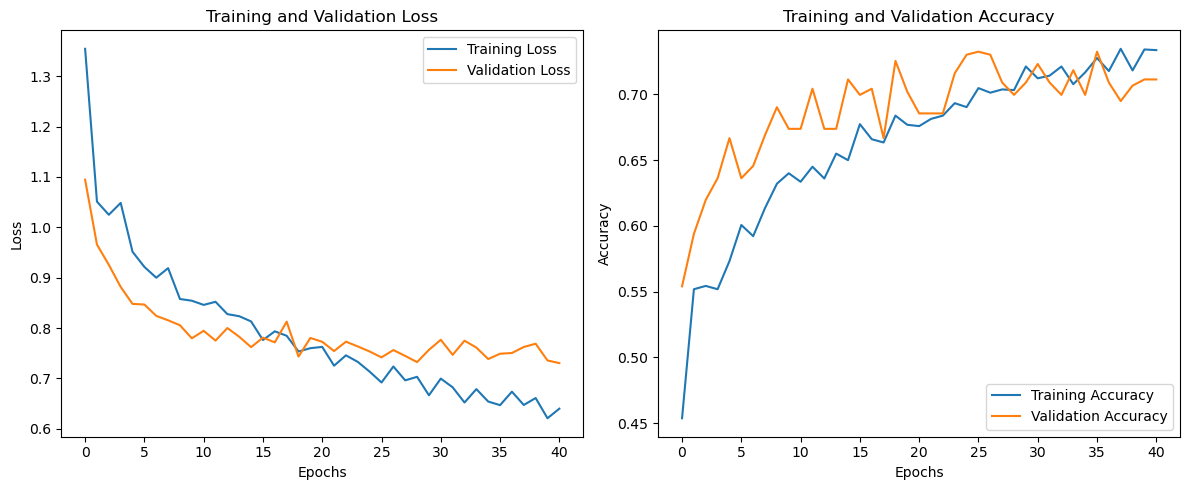

In [ ]:
plot_loss_curves(history2 , 'model_2' )

In [ ]:
model2 = tf.keras.models.load_model(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Models/Model_files/model_2"))
model2.load_weights(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_checkpoints/model_2.h5"))
model2.save(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_files/model_2.h5"))

In [ ]:
test_loss , test_accuracy = model2.evaluate(test_data)
test_loss , test_accuracy

449/449 [==============================] - 29s 60ms/step
Accuracy: 0.65
Precision: 0.67
Recall: 0.65


C:\Users\Welcome\AppData\Local\Temp\ipykernel_5928\2180858203.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\Welcome\AppData\Local\Temp\ipykernel_5928\2180858203.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


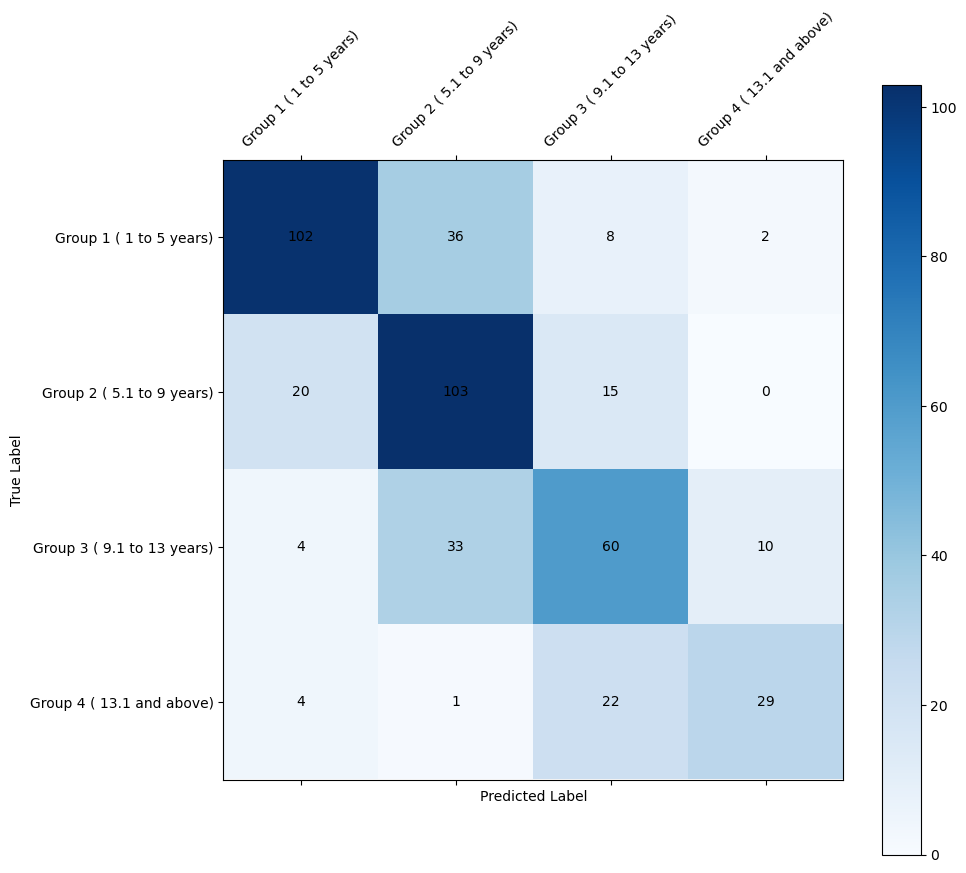

In [ ]:
accuracy , precision , recall = Ploting_Confusion_matrix(test_data , model2 , 'model_2')

In [ ]:
# Example data to append
num_epochs_trained = len(history2.history['loss'])
new_row_data = {"Model_name": ["Inceptionv3 (30 layers unfreezed)"], "accuracy": [accuracy], "precision": [precision], "recall": [recall], "training_time": [training_time], "epochs": [num_epochs_trained]}

# CSV filename
csv_filename = os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/model_metrics.csv")

# Append row to DataFrame and save to CSV
append_row_to_dataframe(new_row_data, csv_filename)


                          Model_name  accuracy  precision    recall  \
0  Inceptionv3 (30 layers unfreezed)  0.654788   0.666008  0.654788   

   training_time epochs  
0     3887.30428     41  


C:\Users\Welcome\AppData\Local\Temp\ipykernel_5928\1023220680.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,data])


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.applications.inception_v3 import InceptionV3


def create_cnn_model(input_shape, num_classes):


    base_model = InceptionV3(input_shape = (224 ,224 , 3), include_top = False, weights = 'imagenet')
    base_model.trainable = True


    x = layers.Flatten()(base_model.output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)

    # Add a final softmax layer with 4 node for classification output
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.models.Model(base_model.input, x)
    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)  # Example input shape for image data (height, width, channels)
num_classes = test_data.num_classes # Example number of classes

# Create the CNN model
model3 = create_cnn_model(input_shape, num_classes)

# Compile the model
model3.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 2e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
model_checkpoint = callbacks.ModelCheckpoint(filepath=os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_checkpoints/model_3.h5"), monitor='val_accuracy', save_best_only=True)
tensorboard_callback = create_tensorboard_callback( experiment_name="Model3")
# Train the model with callbacks
# Start time
start_time = time.time()
history3 = model3.fit(train_data,
                    epochs=80,
                    validation_data=val_data,
                    callbacks=[ model_checkpoint , tensorboard_callback,early_stopping])
# End time
end_time = time.time()
# Calculate total training time
training_time = end_time - start_time


# # Save training time to a file
# with open('Model_Results/training_time.txt', 'w') as file:
#     file.write(f"Total training time model 3: {training_time} seconds\n")
# Print model summary
model3.summary()

model3.save(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Models/Model_files/model_3"))

Saving TensorBoard log files to: Model_Results/LogsDirectory/Model3
Epoch 1/80
63/63 [==============================] - 106s 2s/step - loss: 1.3949 - accuracy: 0.4064 - val_loss: 1.4290 - val_accuracy: 0.4249
Epoch 2/80
63/63 [==============================] - 97s 2s/step - loss: 1.1297 - accuracy: 0.5040 - val_loss: 1.3367 - val_accuracy: 0.4812
Epoch 3/80
63/63 [==============================] - 96s 2s/step - loss: 1.0889 - accuracy: 0.5269 - val_loss: 0.9679 - val_accuracy: 0.5563
Epoch 4/80
63/63 [==============================] - 94s 1s/step - loss: 1.0417 - accuracy: 0.5488 - val_loss: 1.0175 - val_accuracy: 0.5211
Epoch 5/80
63/63 [==============================] - 97s 2s/step - loss: 0.9137 - accuracy: 0.5996 - val_loss: 0.9011 - val_accuracy: 0.5892
Epoch 6/80
63/63 [==============================] - 96s 2s/step - loss: 0.8667 - accuracy: 0.6444 - val_loss: 0.8399 - val_accuracy: 0.6362
Epoch 7/80
63/63 [==============================] - 93s 1s/step - loss: 0.8395 - accuracy: 

INFO:tensorflow:Assets written to: Model_Results/Models/Model_files/model_3\assets


INFO:tensorflow:Assets written to: Model_Results/Models/Model_files/model_3\assets


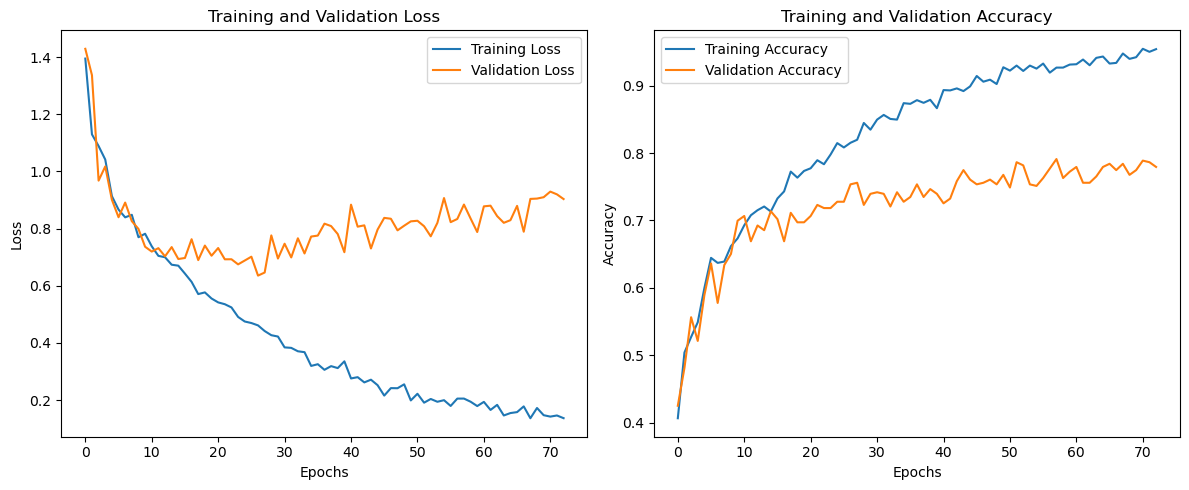

In [ ]:
plot_loss_curves(history3 , 'model_3' )

In [ ]:
model3 = tf.keras.models.load_model(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Models/Model_files/model_3"))
model3.load_weights(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_checkpoints/model_3.h5"))
model3.save(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_files/model_3.h5"))

449/449 [==============================] - 26s 54ms/step
Accuracy: 0.74
Precision: 0.75
Recall: 0.74


C:\Users\Welcome\AppData\Local\Temp\ipykernel_5928\2180858203.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\Welcome\AppData\Local\Temp\ipykernel_5928\2180858203.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


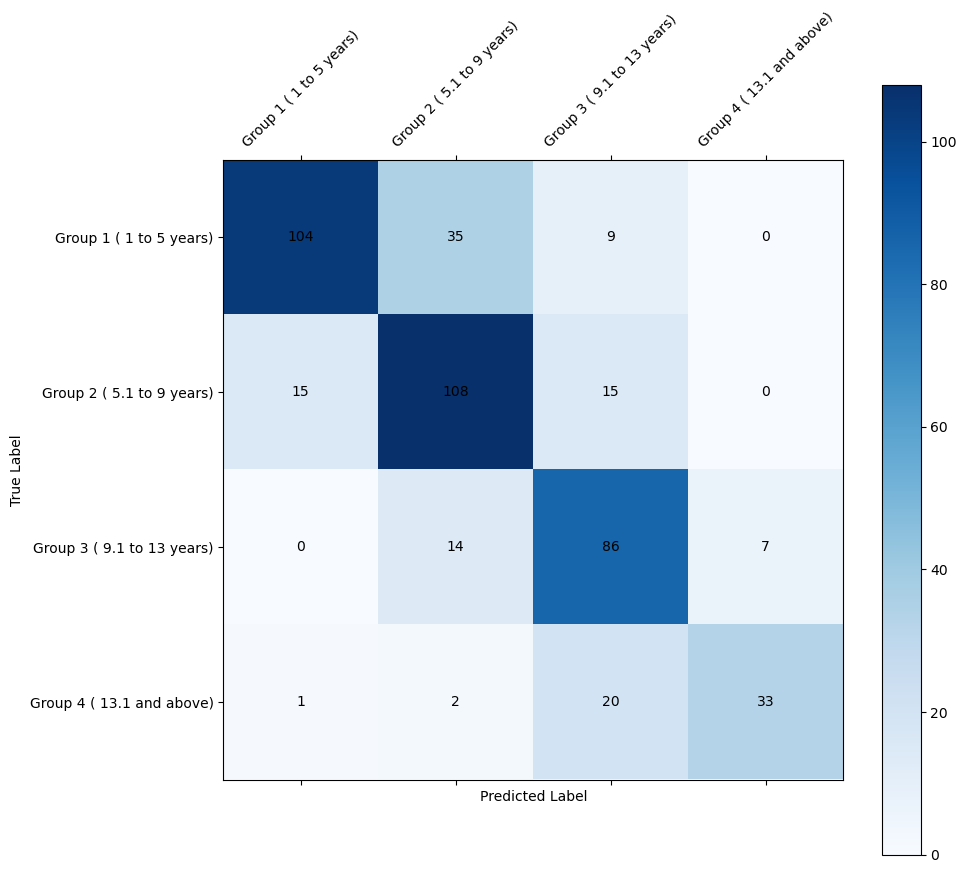

In [ ]:
accuracy , precision , recall = Ploting_Confusion_matrix(test_data , model3 , 'model_3')

In [ ]:
# Example data to append
num_epochs_trained = len(history3.history['loss'])
new_row_data = {"Model_name": ["Inceptionv3"], "accuracy": [accuracy], "precision": [precision], "recall": [recall], "training_time": [training_time], "epochs": [num_epochs_trained]}

# CSV filename
csv_filename = os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/model_metrics.csv")

# Append row to DataFrame and save to CSV
append_row_to_dataframe(new_row_data, csv_filename)

                          Model_name  accuracy  precision    recall  \
0  Inceptionv3 (30 layers unfreezed)  0.654788   0.666008  0.654788   
0                        Inceptionv3  0.737194   0.754982  0.737194   

   training_time  epochs  
0     3887.30428      41  
0     6881.74160      73  


In [ ]:

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2


def create_cnn_model(input_shape, num_classes):


    base_model = InceptionResNetV2(input_shape = (224 ,224 , 3), include_top = False, weights = 'imagenet')
    base_model.trainable = True


    x = layers.Flatten()(base_model.output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)

    ## Add a final softmax layer with 4 node for classification output
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.models.Model(base_model.input, x)
    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)  # Example input shape for image data (height, width, channels)
num_classes = test_data.num_classes # Example number of classes

# Create the CNN model
model4 = create_cnn_model(input_shape, num_classes)

# Compile the model
model4.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 2e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
model_checkpoint = callbacks.ModelCheckpoint(filepath=os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_checkpoints/model_4.h5"), monitor='val_accuracy', save_best_only=True)
tensorboard_callback = create_tensorboard_callback( experiment_name="Model4")
# Train the model with callbacks
# Start time
start_time = time.time()
history4 = model4.fit(train_data,
                    epochs=80,
                    validation_data=val_data,
                    callbacks=[ model_checkpoint , tensorboard_callback,early_stopping])
# End time
end_time = time.time()
# Calculate total training time
training_time = end_time - start_time


# Save training time to a file
# with open('Model_Results/training_time.txt', 'w') as file:
#     file.write(f"Total training time model 4: {training_time} seconds\n")
# Print model summary
model4.summary()

model4.save(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Models/Model_files/model_4"))

219055592/219055592 [==============================] - 20s 0us/step
Saving TensorBoard log files to: Model_Results/LogsDirectory/Model4
Epoch 1/80
63/63 [==============================] - 130s 2s/step - loss: 1.3563 - accuracy: 0.4019 - val_loss: 2.0440 - val_accuracy: 0.4085
Epoch 2/80
63/63 [==============================] - 102s 2s/step - loss: 1.1456 - accuracy: 0.4910 - val_loss: 1.3512 - val_accuracy: 0.4742
Epoch 3/80
63/63 [==============================] - 102s 2s/step - loss: 1.0170 - accuracy: 0.5603 - val_loss: 1.1267 - val_accuracy: 0.5423
Epoch 4/80
63/63 [==============================] - 102s 2s/step - loss: 0.9639 - accuracy: 0.5971 - val_loss: 0.9837 - val_accuracy: 0.5516
Epoch 5/80
63/63 [==============================] - 102s 2s/step - loss: 0.9064 - accuracy: 0.6200 - val_loss: 0.8325 - val_accuracy: 0.6221
Epoch 6/80
63/63 [==============================] - 102s 2s/step - loss: 0.8653 - accuracy: 0.6384 - val_loss: 0.7828 - val_accuracy: 0.6667
Epoch 7/80
63/63 [

INFO:tensorflow:Assets written to: Model_Results/Models/Model_files/model_4\assets


INFO:tensorflow:Assets written to: Model_Results/Models/Model_files/model_4\assets


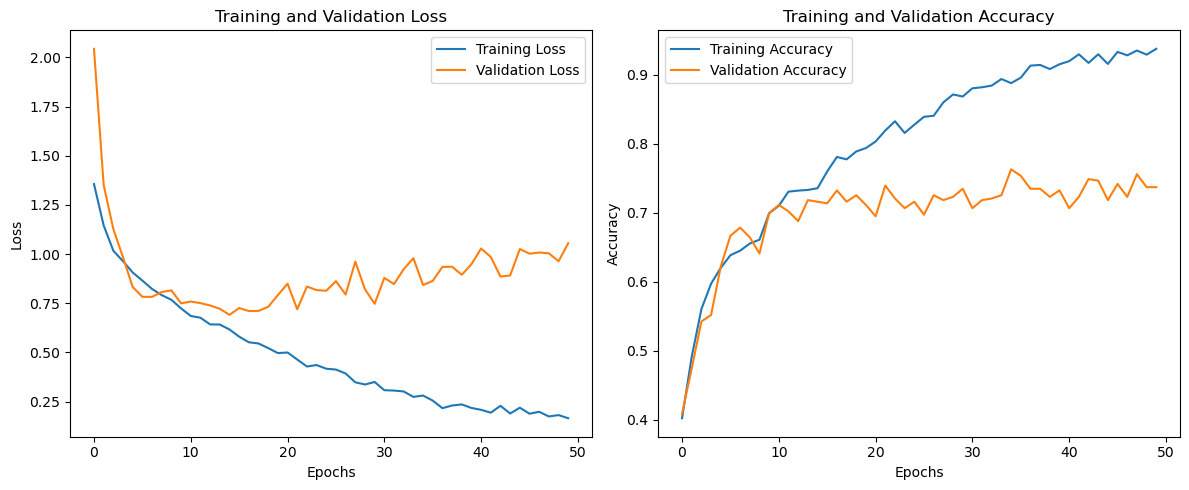

In [ ]:
plot_loss_curves(history4 , 'model_4' )

In [ ]:
model4 = tf.keras.models.load_model(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Models/Model_files/model_4"))
model4.load_weights(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_checkpoints/model_4.h5"))
model4.save(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_files/model_4.h5"))

449/449 [==============================] - 42s 84ms/step
Accuracy: 0.70
Precision: 0.70
Recall: 0.70


C:\Users\Welcome\AppData\Local\Temp\ipykernel_5928\2180858203.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\Welcome\AppData\Local\Temp\ipykernel_5928\2180858203.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


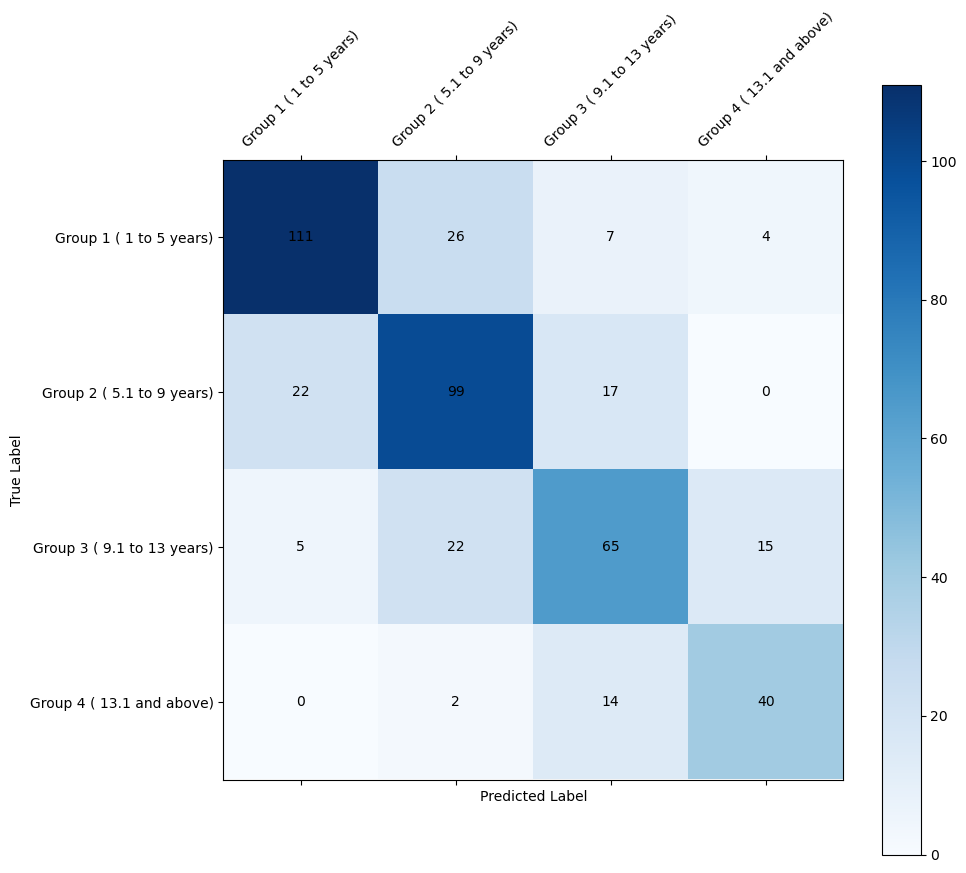

In [ ]:
accuracy , precision , recall = Ploting_Confusion_matrix(test_data , model4 , 'model_4')

In [ ]:
# Example data to append
num_epochs_trained = len(history4.history['loss'])
new_row_data = {"Model_name": ["InceptionResnet"], "accuracy": [accuracy], "precision": [precision], "recall": [recall], "training_time": [training_time], "epochs": [num_epochs_trained]}

# CSV filename
csv_filename = os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/model_metrics.csv")

# Append row to DataFrame and save to CSV
append_row_to_dataframe(new_row_data, csv_filename)

                          Model_name  accuracy  precision    recall  \
0  Inceptionv3 (30 layers unfreezed)  0.654788   0.666008  0.654788   
1                        Inceptionv3  0.737194   0.754982  0.737194   
0                    InceptionResnet  0.701559   0.704288  0.701559   

   training_time  epochs  
0    3887.304280      41  
1    6881.741600      73  
0    4947.767156      50  


In [ ]:

from tensorflow.keras.applications.resnet_v2 import ResNet50V2


def create_cnn_model(input_shape, num_classes):


    base_model =ResNet50V2(input_shape = (224 ,224 , 3), include_top = False, weights = 'imagenet')
    base_model.trainable = True


    x = layers.Flatten()(base_model.output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)

    # Add a final softmax layer with 4 node for classification output
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.models.Model(base_model.input, x)
    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)  # Example input shape for image data (height, width, channels)
num_classes = test_data.num_classes # Example number of classes

# Create the CNN model
model5 = create_cnn_model(input_shape, num_classes)

# Compile the model
model5.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 2e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
model_checkpoint = callbacks.ModelCheckpoint(filepath=os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_checkpoints/model_5.h5"), monitor='val_accuracy', save_best_only=True)
tensorboard_callback = create_tensorboard_callback(experiment_name="Model5")
# Train the model with callbacks
# Start time
start_time = time.time()
history5 = model5.fit(train_data,
                    epochs=80,
                    validation_data=val_data,
                    callbacks=[ model_checkpoint , tensorboard_callback,early_stopping])
# End time
end_time = time.time()
# Calculate total training time
training_time = end_time - start_time


# # Save training time to a file
# with open('Model_Results/training_time.txt', 'w') as file:
#     file.write(f"Total training time model 5: {training_time} seconds\n")
# Print model summary
model5.summary()

model5.save(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Models/Model_files/model_5"))

94668760/94668760 [==============================] - 10s 0us/step
Saving TensorBoard log files to: Model_Results/LogsDirectory/Model5
Epoch 1/80
63/63 [==============================] - 110s 2s/step - loss: 1.8814 - accuracy: 0.3850 - val_loss: 2.3881 - val_accuracy: 0.3944
Epoch 2/80
63/63 [==============================] - 102s 2s/step - loss: 1.3247 - accuracy: 0.5164 - val_loss: 1.2071 - val_accuracy: 0.5423
Epoch 3/80
63/63 [==============================] - 102s 2s/step - loss: 1.1417 - accuracy: 0.5199 - val_loss: 1.0437 - val_accuracy: 0.5728
Epoch 4/80
63/63 [==============================] - 102s 2s/step - loss: 1.0206 - accuracy: 0.5573 - val_loss: 0.8746 - val_accuracy: 0.6385
Epoch 5/80
63/63 [==============================] - 99s 2s/step - loss: 0.9469 - accuracy: 0.5847 - val_loss: 0.8795 - val_accuracy: 0.6197
Epoch 6/80
63/63 [==============================] - 98s 2s/step - loss: 0.9015 - accuracy: 0.6175 - val_loss: 0.8342 - val_accuracy: 0.6362
Epoch 7/80
63/63 [====

INFO:tensorflow:Assets written to: Model_Results/Models/Model_files/model_5\assets


INFO:tensorflow:Assets written to: Model_Results/Models/Model_files/model_5\assets


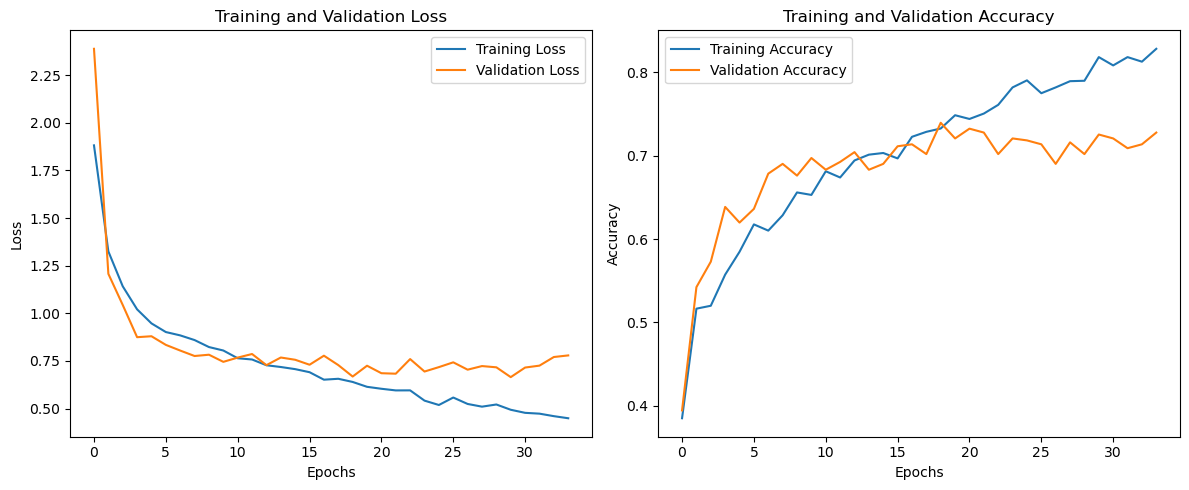

In [ ]:
plot_loss_curves(history5 , 'model_5' )

In [ ]:
model5 = tf.keras.models.load_model(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Models/Model_files/model_5"))
model5.load_weights(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_checkpoints/model_5.h5"))
model5.save(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_files/model_5.h5"))

449/449 [==============================] - 22s 46ms/step
Accuracy: 0.66
Precision: 0.67
Recall: 0.66


C:\Users\Welcome\AppData\Local\Temp\ipykernel_5928\2180858203.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\Welcome\AppData\Local\Temp\ipykernel_5928\2180858203.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


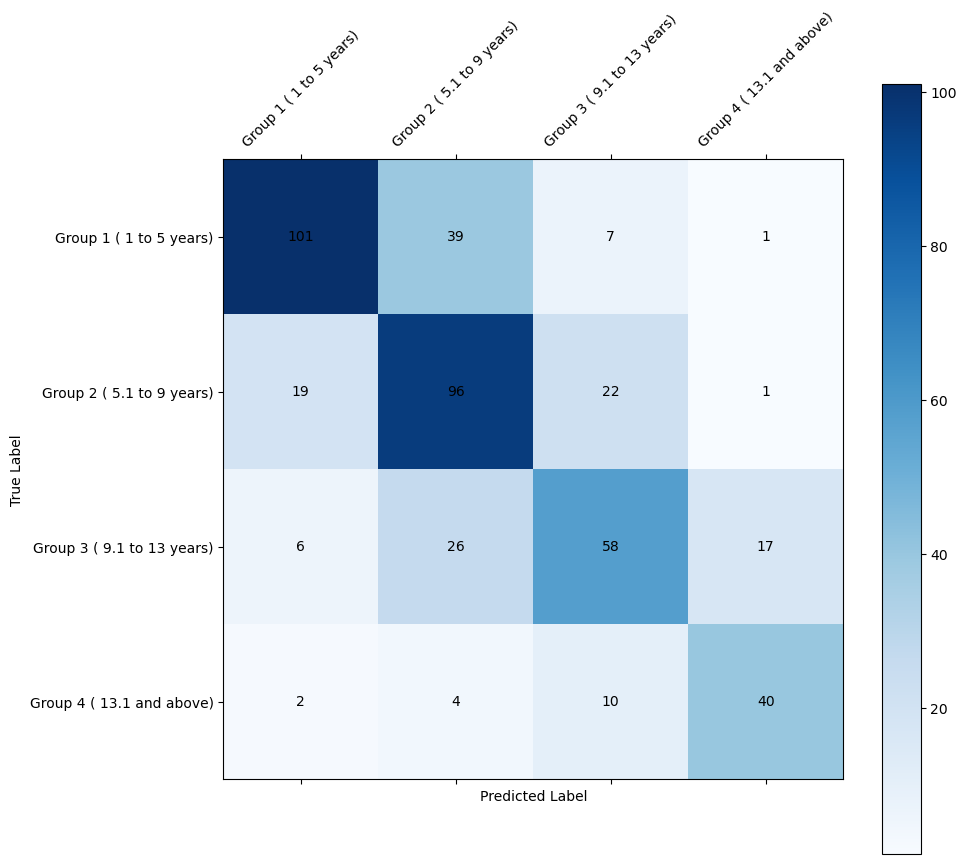

In [ ]:
accuracy , precision , recall = Ploting_Confusion_matrix(test_data , model5 , 'model_5')

In [ ]:
# Example data to append
num_epochs_trained = len(history5.history['loss'])
new_row_data = {"Model_name": ["Resnet50v2"], "accuracy": [accuracy], "precision": [precision], "recall": [recall], "training_time": [training_time], "epochs": [num_epochs_trained]}

# CSV filename
csv_filename =os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/model_metrics.csv")

# Append row to DataFrame and save to CSV
append_row_to_dataframe(new_row_data, csv_filename)

                          Model_name  accuracy  precision    recall  \
0  Inceptionv3 (30 layers unfreezed)  0.654788   0.666008  0.654788   
1                        Inceptionv3  0.737194   0.754982  0.737194   
2                    InceptionResnet  0.701559   0.704288  0.701559   
0                         Resnet50v2  0.657016   0.665964  0.657016   

   training_time  epochs  
0    3887.304280      41  
1    6881.741600      73  
2    4947.767156      50  
0    3366.548256      34  


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

def create_cnn_model(input_shape, num_classes):
    base_model = VGG16(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = True

    x = layers.Flatten()(base_model.output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.models.Model(base_model.input, x)
    return model


# Define input shape and number of classes
input_shape = (224, 224, 3)  # Example input shape for image data (height, width, channels)
num_classes = test_data.num_classes # Example number of classes

# Create the CNN model
model6 = create_cnn_model(input_shape, num_classes)

# Compile the model
model6.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 2e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
model_checkpoint = callbacks.ModelCheckpoint(filepath=os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_checkpoints/model_6.h5"), monitor='val_accuracy', save_best_only=True)
tensorboard_callback = create_tensorboard_callback(experiment_name="Model6")
# Train the model with callbacks
# Start time
start_time = time.time()
history6 = model6.fit(train_data,
                    epochs=80,
                    validation_data=val_data,
                    callbacks=[ model_checkpoint , tensorboard_callback,early_stopping])
# End time
end_time = time.time()
# Calculate total training time
training_time = end_time - start_time


# # Save training time to a file
# with open('Model_Results/training_time.txt', 'w') as file:
#     file.write(f"Total training time model 6: {training_time} seconds\n")
# Print model summary
model6.summary()

model6.save(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Models/Model_files/model_6"))

58889256/58889256 [==============================] - 7s 0us/step
Saving TensorBoard log files to: Model_Results/LogsDirectory/Model6
Epoch 1/80
63/63 [==============================] - 117s 2s/step - loss: 1.3727 - accuracy: 0.3386 - val_loss: 1.2137 - val_accuracy: 0.4343
Epoch 2/80
63/63 [==============================] - 100s 2s/step - loss: 1.1703 - accuracy: 0.4676 - val_loss: 0.9378 - val_accuracy: 0.5704
Epoch 3/80
63/63 [==============================] - 100s 2s/step - loss: 0.9805 - accuracy: 0.5707 - val_loss: 0.8167 - val_accuracy: 0.6315
Epoch 4/80
63/63 [==============================] - 100s 2s/step - loss: 0.8928 - accuracy: 0.6135 - val_loss: 0.7333 - val_accuracy: 0.6948
Epoch 5/80
63/63 [==============================] - 99s 2s/step - loss: 0.8310 - accuracy: 0.6384 - val_loss: 0.8208 - val_accuracy: 0.6362
Epoch 6/80
63/63 [==============================] - 101s 2s/step - loss: 0.8147 - accuracy: 0.6419 - val_loss: 0.6903 - val_accuracy: 0.7066
Epoch 7/80
63/63 [====

INFO:tensorflow:Assets written to: Model_Results/Models/Model_files/model_6\assets


INFO:tensorflow:Assets written to: Model_Results/Models/Model_files/model_6\assets


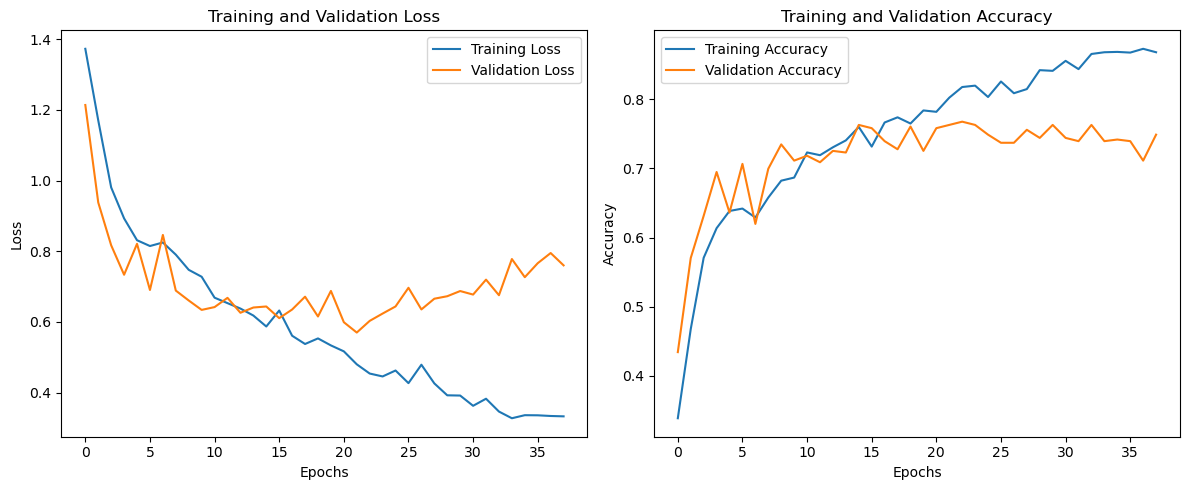

In [ ]:
plot_loss_curves(history6 , 'model_6' )

In [ ]:
model6 = tf.keras.models.load_model(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Models/Model_files/model_6"))
model6.load_weights(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_checkpoints/model_6.h5"))
model6.save(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_files/model_6.h5"))

449/449 [==============================] - 16s 35ms/step
Accuracy: 0.68
Precision: 0.70
Recall: 0.68


C:\Users\Welcome\AppData\Local\Temp\ipykernel_5928\2180858203.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\Welcome\AppData\Local\Temp\ipykernel_5928\2180858203.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


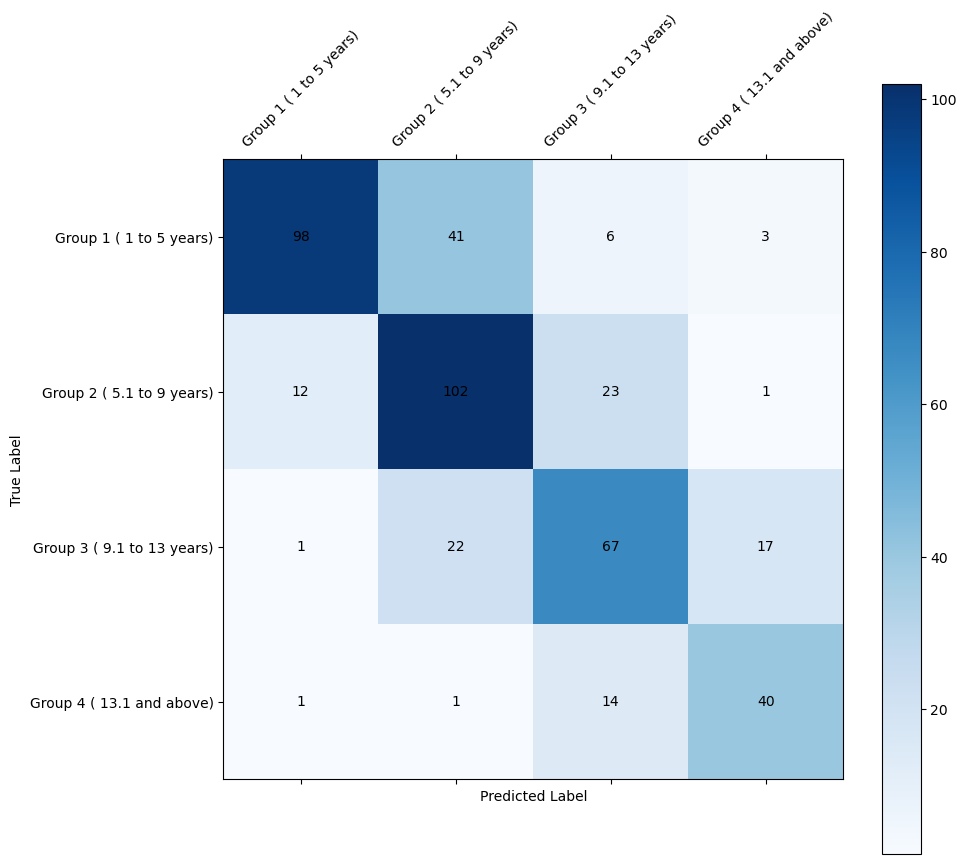

In [ ]:
accuracy , precision , recall = Ploting_Confusion_matrix(test_data , model6 , 'model_6')

In [ ]:
# Example data to append
num_epochs_trained = len(history6.history['loss'])
new_row_data = {"Model_name": ["VGG Net"], "accuracy": [accuracy], "precision": [precision], "recall": [recall], "training_time": [training_time], "epochs": [num_epochs_trained]}

# CSV filename
csv_filename =os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/model_metrics.csv")

# Append row to DataFrame and save to CSV
append_row_to_dataframe(new_row_data, csv_filename)

                          Model_name  accuracy  precision    recall  \
0  Inceptionv3 (30 layers unfreezed)  0.654788   0.666008  0.654788   
1                        Inceptionv3  0.737194   0.754982  0.737194   
2                    InceptionResnet  0.701559   0.704288  0.701559   
3                         Resnet50v2  0.657016   0.665964  0.657016   
0                            VGG Net  0.683742   0.704208  0.683742   

   training_time  epochs  
0    3887.304280      41  
1    6881.741600      73  
2    4947.767156      50  
3    3366.548256      34  
0    3785.072678      38  


In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet

def create_cnn_model(input_shape, num_classes):
    base_model = MobileNet(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = True

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.models.Model(base_model.input, x)
    return model


# Define input shape and number of classes
input_shape = (224, 224, 3)  # Example input shape for image data (height, width, channels)
num_classes = test_data.num_classes # Example number of classes

# Create the CNN model
model7 = create_cnn_model(input_shape, num_classes)

# Compile the model
model7.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 2e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
model_checkpoint = callbacks.ModelCheckpoint(filepath=os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_checkpoints/model_7.h5"), monitor='val_accuracy', save_best_only=True)
tensorboard_callback = create_tensorboard_callback(experiment_name="Model7")
# Train the model with callbacks
# Start time
start_time = time.time()
history7 = model7.fit(train_data,
                    epochs=80,
                    validation_data=val_data,
                    callbacks=[ model_checkpoint , tensorboard_callback,early_stopping])
# End time
end_time = time.time()
# Calculate total training time
training_time = end_time - start_time


# Save training time to a file
# with open('Model_Results/training_time.txt', 'w') as file:
#     file.write(f"Total training time model 7: {training_time} seconds\n")
# Print model summary
model7.summary()

model7.save(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Models/Model_files/model_7"))

Saving TensorBoard log files to: Model_Results/LogsDirectory/Model7
Epoch 1/80
63/63 [==============================] - 108s 2s/step - loss: 1.1326 - accuracy: 0.5055 - val_loss: 1.2786 - val_accuracy: 0.4648
Epoch 2/80
63/63 [==============================] - 99s 2s/step - loss: 0.8762 - accuracy: 0.6270 - val_loss: 0.8213 - val_accuracy: 0.6479
Epoch 3/80
63/63 [==============================] - 100s 2s/step - loss: 0.7916 - accuracy: 0.6718 - val_loss: 0.7573 - val_accuracy: 0.6385
Epoch 4/80
63/63 [==============================] - 100s 2s/step - loss: 0.7221 - accuracy: 0.7072 - val_loss: 0.6559 - val_accuracy: 0.7394
Epoch 5/80
63/63 [==============================] - 99s 2s/step - loss: 0.6740 - accuracy: 0.7062 - val_loss: 0.8116 - val_accuracy: 0.6714
Epoch 6/80
63/63 [==============================] - 100s 2s/step - loss: 0.6353 - accuracy: 0.7380 - val_loss: 0.6277 - val_accuracy: 0.7254
Epoch 7/80
63/63 [==============================] - 99s 2s/step - loss: 0.5984 - accurac

INFO:tensorflow:Assets written to: Model_Results/Models/Model_files/model_7\assets


INFO:tensorflow:Assets written to: Model_Results/Models/Model_files/model_7\assets


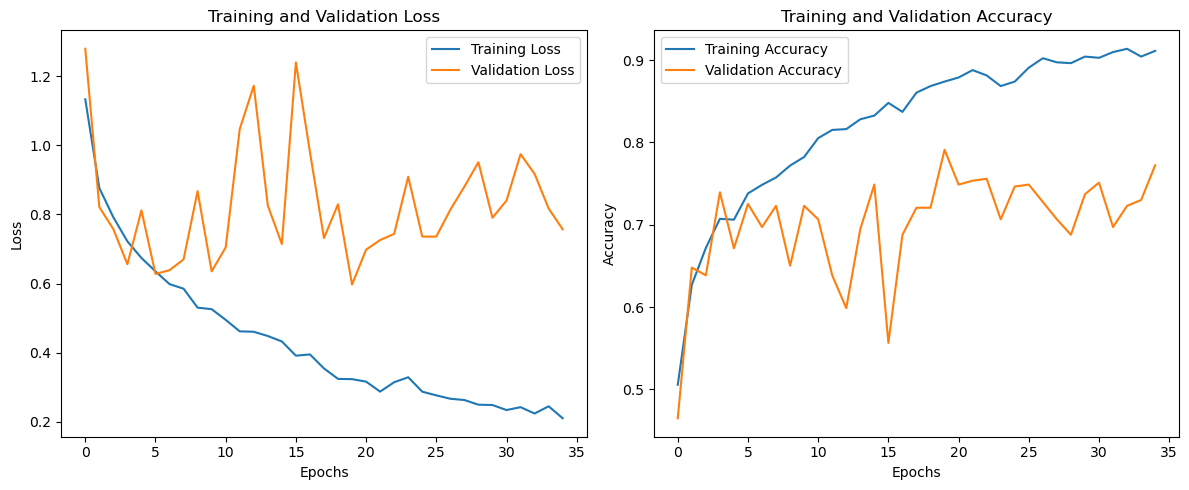

In [ ]:
plot_loss_curves(history7 , 'model_7' )

In [ ]:
model7 = tf.keras.models.load_model(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Models/Model_files/model_7"))
model7.load_weights(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_checkpoints/model_7.h5"))
model7.save(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_files/model_7.h5"))

449/449 [==============================] - 20s 43ms/step
Accuracy: 0.73
Precision: 0.73
Recall: 0.73


C:\Users\Welcome\AppData\Local\Temp\ipykernel_5928\2180858203.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\Welcome\AppData\Local\Temp\ipykernel_5928\2180858203.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


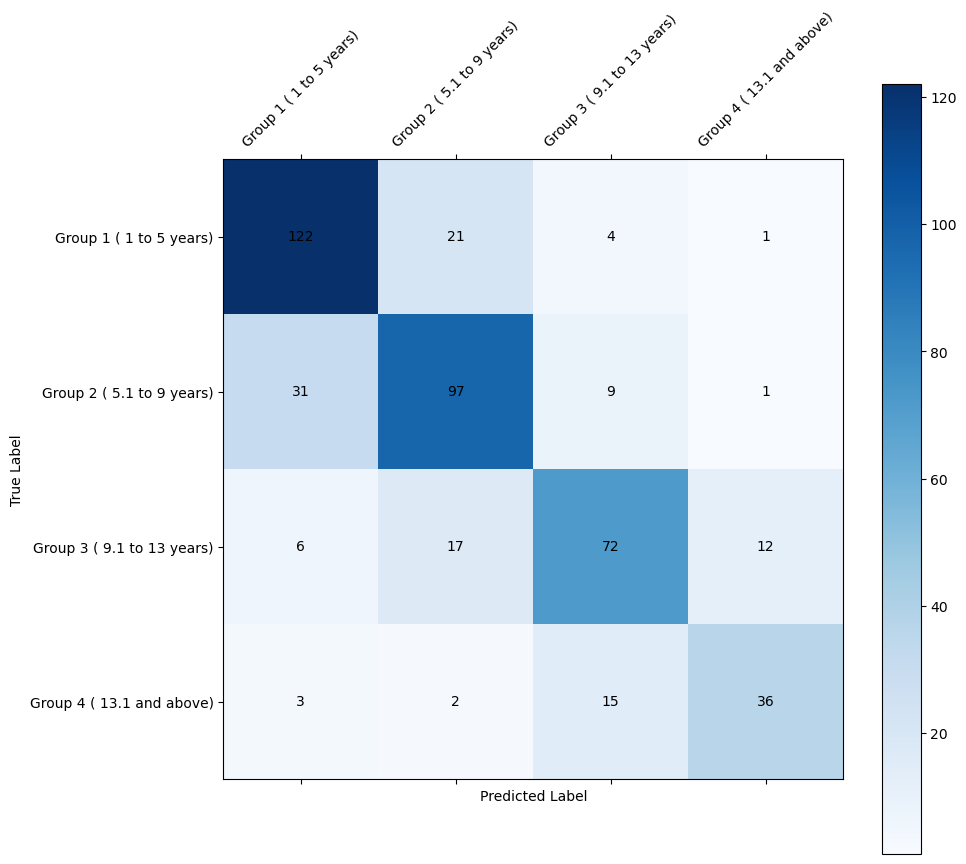

In [ ]:
accuracy , precision , recall = Ploting_Confusion_matrix(test_data , model7 , 'model_7')

In [ ]:
# Example data to append
num_epochs_trained = len(history7.history['loss'])
new_row_data = {"Model_name": ["MobileNet"], "accuracy": [accuracy], "precision": [precision], "recall": [recall], "training_time": [training_time], "epochs": [num_epochs_trained]}

# CSV filename
csv_filename = os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/model_metrics.csv")

# Append row to DataFrame and save to CSV
append_row_to_dataframe(new_row_data, csv_filename)

                          Model_name  accuracy  precision    recall  \
0  Inceptionv3 (30 layers unfreezed)  0.654788   0.666008  0.654788   
1                        Inceptionv3  0.737194   0.754982  0.737194   
2                    InceptionResnet  0.701559   0.704288  0.701559   
3                         Resnet50v2  0.657016   0.665964  0.657016   
4                            VGG Net  0.683742   0.704208  0.683742   
0                          MobileNet  0.728285   0.727227  0.728285   

   training_time  epochs  
0    3887.304280      41  
1    6881.741600      73  
2    4947.767156      50  
3    3366.548256      34  
4    3785.072678      38  
0    3467.137447      35  


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.applications.densenet import DenseNet121

def create_cnn_model(input_shape, num_classes):
    base_model = DenseNet121(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = True

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.models.Model(base_model.input, x)
    return model


# Define input shape and number of classes
input_shape = (224, 224, 3)  # Example input shape for image data (height, width, channels)
num_classes = test_data.num_classes # Example number of classes

# Create the CNN model
model8 = create_cnn_model(input_shape, num_classes)

# Compile the model
model8.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 2e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
model_checkpoint = callbacks.ModelCheckpoint(filepath=os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_checkpoints/model_8.h5"), monitor='val_accuracy', save_best_only=True)
tensorboard_callback = create_tensorboard_callback(experiment_name="Model5")
# Train the model with callbacks
# Start time
start_time = time.time()
history8 = model8.fit(train_data,
                    epochs=80,
                    validation_data=val_data,
                    callbacks=[ model_checkpoint , tensorboard_callback,early_stopping])
# End time
end_time = time.time()
# Calculate total training time
training_time = end_time - start_time


# # Save training time to a file
# with open('Model_Results/Training_time/training_time8.txt', 'w') as file:
#     file.write(f"Total training time model 8: {training_time} seconds\n")
# Print model summary


29084464/29084464 [==============================] - 4s 0us/step
Saving TensorBoard log files to: Model_Results/LogsDirectory/Model5
Epoch 1/80
63/63 [==============================] - 118s 2s/step - loss: 1.2563 - accuracy: 0.4148 - val_loss: 1.1900 - val_accuracy: 0.4202
Epoch 2/80
63/63 [==============================] - 103s 2s/step - loss: 0.9964 - accuracy: 0.5603 - val_loss: 1.1521 - val_accuracy: 0.4507
Epoch 3/80
63/63 [==============================] - 102s 2s/step - loss: 0.8674 - accuracy: 0.6280 - val_loss: 0.9600 - val_accuracy: 0.5704
Epoch 4/80
63/63 [==============================] - 102s 2s/step - loss: 0.8125 - accuracy: 0.6519 - val_loss: 0.8392 - val_accuracy: 0.6268
Epoch 5/80
63/63 [==============================] - 102s 2s/step - loss: 0.7564 - accuracy: 0.6803 - val_loss: 0.8054 - val_accuracy: 0.6362
Epoch 6/80
63/63 [==============================] - 101s 2s/step - loss: 0.7005 - accuracy: 0.7042 - val_loss: 0.7192 - val_accuracy: 0.6925
Epoch 7/80
63/63 [===

FileNotFoundError: [Errno 2] No such file or directory: 'Model_Results/Training_time/training_time8.txt'

In [ ]:
model8.summary()

model8.save(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Models/Model_files/model_8"))

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_11[0][0]']               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                           

INFO:tensorflow:Assets written to: Model_Results/Models/Model_files/model_8\assets


INFO:tensorflow:Assets written to: Model_Results/Models/Model_files/model_8\assets


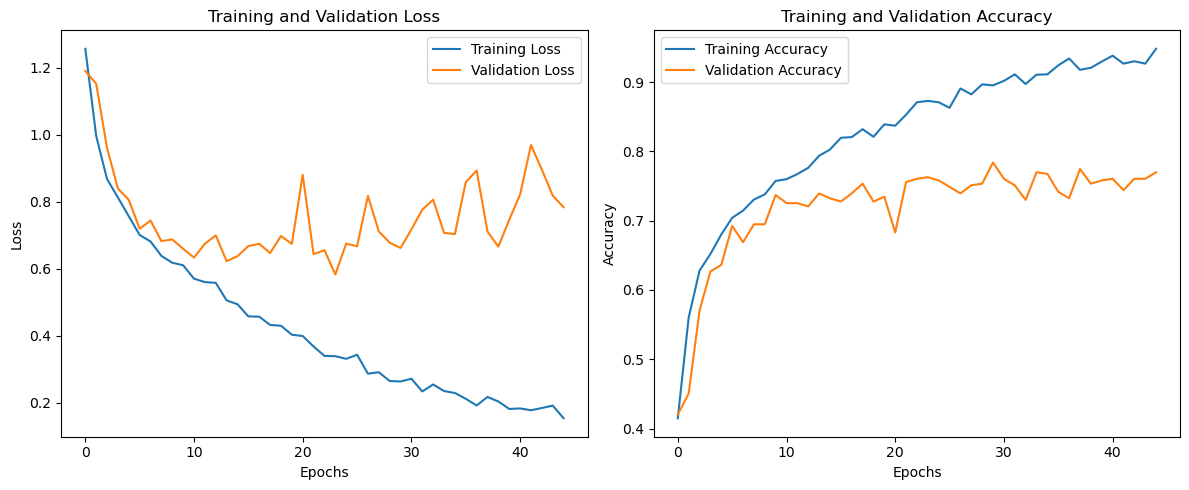

In [ ]:
plot_loss_curves(history8 , 'model_8' )

In [ ]:
model8 = tf.keras.models.load_model(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Models/Model_files/model_8"))
model8.load_weights(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_checkpoints/model_8.h5"))
model8.save(os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/Model_files/model_8.h5"))

449/449 [==============================] - 30s 62ms/step
Accuracy: 0.71
Precision: 0.72
Recall: 0.71


C:\Users\Welcome\AppData\Local\Temp\ipykernel_5928\2180858203.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\Welcome\AppData\Local\Temp\ipykernel_5928\2180858203.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


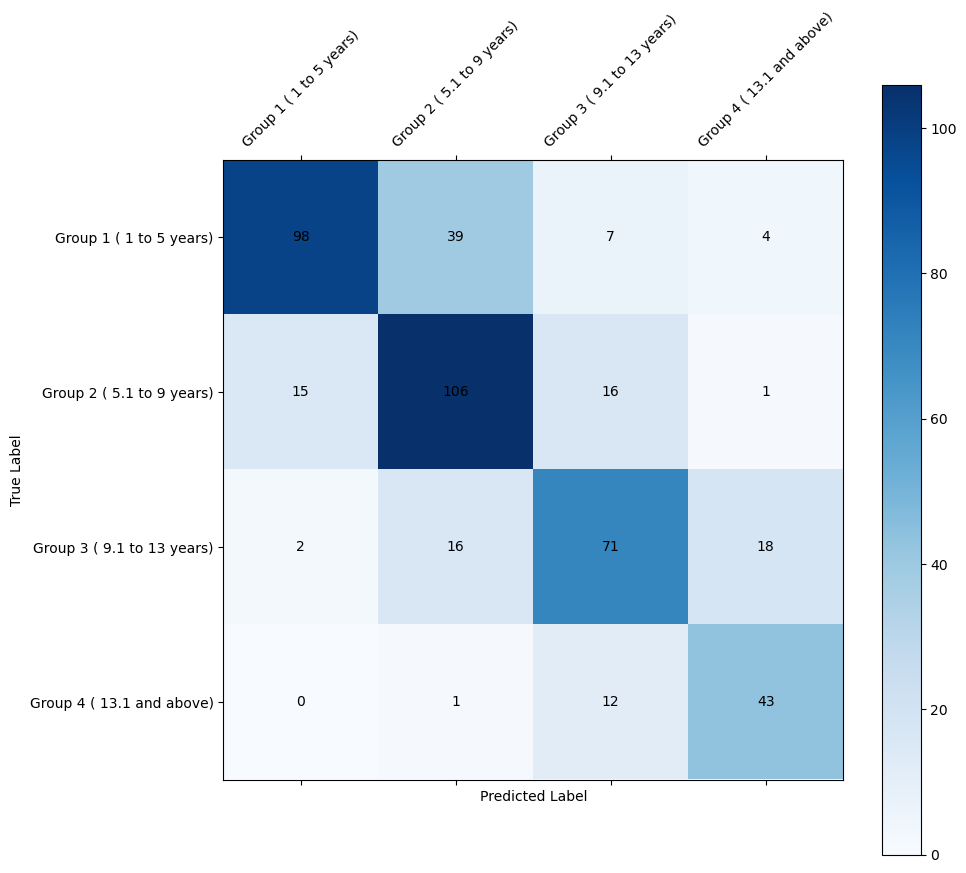

In [ ]:
accuracy , precision , recall = Ploting_Confusion_matrix(test_data , model8 , 'model_8')

In [ ]:
# Example data to append
num_epochs_trained = len(history8.history['loss'])
new_row_data = {"Model_name": ["DenseNet"], "accuracy": [accuracy], "precision": [precision], "recall": [recall], "training_time": [training_time], "epochs": [num_epochs_trained]}

# CSV filename
csv_filename = os.path.join(home_folder,"MODEL TRAINING/1/Model_Results/model_metrics.csv")

# Append row to DataFrame and save to CSV
append_row_to_dataframe(new_row_data, csv_filename)

                          Model_name  accuracy  precision    recall  \
0  Inceptionv3 (30 layers unfreezed)  0.654788   0.666008  0.654788   
1                        Inceptionv3  0.737194   0.754982  0.737194   
2                    InceptionResnet  0.701559   0.704288  0.701559   
3                         Resnet50v2  0.657016   0.665964  0.657016   
4                            VGG Net  0.683742   0.704208  0.683742   
5                          MobileNet  0.728285   0.727227  0.728285   
0                           DenseNet  0.708241   0.722879  0.708241   

   training_time  epochs  
0    3887.304280      41  
1    6881.741600      73  
2    4947.767156      50  
3    3366.548256      34  
4    3785.072678      38  
5    3467.137447      35  
0    4535.210918      45  
